In [2]:
# importing tool functions
import numpy as np
import matplotlib.pyplot as plt
from tools import utils, ml_tools
import pandas as pd
import numpy as np

In [3]:
# machine learning imports
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils

In [4]:
# graphing tools
import seaborn as sns
from scipy.stats import sem
import matplotlib
import scienceplots

plt.style.use(['science', 'ieee','no-latex'])
matplotlib.rc('font', family='times new roman')

# time
import time 

In [5]:
from NN_tools import NN_optimised_parameters_al, NN_optimised_parameters_al, one_hot_enc_labels_bow

# Year 1 & 2 Data

### 1. Import the year 1 & 2 Data

In [6]:
dir_name_e = r'C:\Users\EfiaA\OneDrive - Imperial College London\Imperial academic work\University life\Y4\MSci project\Project_Coding\nlp-physicseducation\Pickledfiles'

In [7]:
# import the yr2 labels
dir_csv3 = 'outputs/labels_cleaned_y1y2.csv'
df3 = pd.read_csv(dir_csv3, encoding='utf-8')

### 1.2 Apply BOW on year 1 & 2 Data

In [8]:
# Argument Level

# X_data -> Content of Lab report 
# for BoW there are 2 outputs, wordvecs and wordvec counts 
# we want wordvec counts only
X_y1y2_bow_al       = np.array(ml_tools.BoW(df3['Content'].tolist()), dtype = object)[1]


# y_data -> Argument level labels 
y_y1y2_bow_al = one_hot_enc_labels_bow(df3, 'ArgumentLevel')


In [10]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_y1y2_bow_al, y_y1y2_bow_al , train_size = 0.8, shuffle=True )

# NEURAL NETWORK INVESTIGATIONS

In [9]:
def NN_node_variation(model1, input1, ephs, X_t, y_t, X_test, y_test, node1, node2):
    maxlen = 100 
    model = model1
    model.add(layers.Dense(node1, input_dim = input1, activation  = 'relu'))
    model.add(layers.Dense(node2, input_dim = input1, activation  = 'relu'))
    model.add(layers.Dense(5,activation = 'softmax'))
    model.add(layers.Flatten())
    model.compile(loss= 'categorical_crossentropy', optimizer= 'rmsprop', metrics= ['accuracy'])
    model.build(input1)
    model.summary()
    history = model.fit(X_t,y_t,epochs = ephs, verbose=True, validation_data=(X_test, y_test), batch_size=30 )
    return history


def NN_data_invest(X, y, tsize, epoch_no, node1, node2):
    X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y , train_size = tsize, shuffle = True )
    input = X_train_b.shape[1] 
    nn1 = NN_node_variation(Sequential(), input, epoch_no, X_train_b, y_train_b, X_test_b, y_test_b, node1, node2)
    return nn1


### 1. Changing the number of nodes

In [10]:
import itertools

node1 = [ 5,10,15,20]
node2 = [6,8,10,12]

node_combo = list(itertools.product(node1, node2))

In [15]:
epochs = [5,10,15,20]




accuracy_per_combo = []
loss_per_combo = []
val_loss_per_combo = []
for i in node_combo:
    a = NN_data_invest(X_y1y2_bow_al,y_y1y2_bow_al , 0.8,100, i[0],i[1])
    accuracy_per_combo.append(a.history['accuracy'])
    loss_per_combo.append(a.history['loss'])
    val_loss_per_combo.append(a.history['loss'])

# create dataframe
df = pd.DataFrame({'nodes': node_combo, 'accuracy':accuracy_per_combo, 'loss': loss_per_combo, 'val_loss': val_loss_per_combo})

    


Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 5)                 37820     
                                                                 
 dense_97 (Dense)            (None, 6)                 36        
                                                                 
 dense_98 (Dense)            (None, 5)                 35        
                                                                 
 flatten_32 (Flatten)        (None, 5)                 0         
                                                                 
Total params: 37,891
Trainable params: 37,891
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 [==============================] - 1s 50ms/step - loss: 1.6510 - accuracy: 0.3028 - val_loss: 1.5818 - val_accuracy: 0.3611
Epoch 2/100
5/5 [========================

In [18]:

df_node_variation = utils.save_as_pickle_file(df,'W10_100ephs_optimisation_of_nodes', dir_name_e)
df_node = utils.load_pickle_file_to_df('W10_100ephs_optimisation_of_nodes', dir_name_e)

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
from matplotlib import rc, rcParams
import pandas as pd
import time

blu = '#A20346'
gre = '#004E7E'
pink = '#008000'


plt.style.use(['science', 'ieee', 'no-latex'])
plt.rcParams['font.family'] = "Arial"
rc('font', weight='normal')


# Plot the first subplot on the left
x1 = np.linspace(1,100,100)
def node_optimisation_plot(x,y):
    for i in range(100):
        #plt.scatter(x,y['accuracy'][i], marker = 's', s= 0.1)
        plt.plot(x, y['accuracy'][i])

    plt.set_xlabel('Training ratio', fontsize=10)
    plt.set_ylabel('Accuracy', fontsize=10)
    plt.xaxis.set_ticks(np.arange(0.3, 1.0, 0.1))
    plt.yaxis.set_ticks(np.arange(0.2, 1.1, 0.1))
    plt.minorticks_off()
    legend = plt.legend( loc='upper right', framealpha=1, frameon=True, edgecolor = 'black', prop = {'size' : 7})
    legend.get_frame().set_linewidth(0.2)
    return

#### 1.2 Changing the number of layers over a small range in LAYER 1

In [57]:
def NN_data_node(X, y, tsize,  epoch_no, node_arr,  node2):
    X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y , train_size = tsize )
    input = X_train_b.shape[1] 

    acc_hist = []
    times    = []
    
    for i in node_arr:
        start_time = time.time()
        # model1, input1, ephs, X_t, y_t, X_test, y_test, node1, node2
        nn1 = NN_node_variation(Sequential(), input, epoch_no, X_train_b, y_train_b, X_test_b, y_test_b, i, node2)
        acc_hist.append(nn1)
        times.append(time.time() - start_time)
    
    return acc_hist, times

In [58]:
nodes = [8,10,12,14,16]
hist_node = NN_data_node(X_y1y2_bow_al, y_y1y2_bow_al, 0.8, 20, nodes, 8)

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_144 (Dense)           (None, 8)                 60512     
                                                                 
 dense_145 (Dense)           (None, 8)                 72        
                                                                 
 dense_146 (Dense)           (None, 5)                 45        
                                                                 
 flatten_48 (Flatten)        (None, 5)                 0         
                                                                 
Total params: 60,629
Trainable params: 60,629
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
5/5 [==============================] - 1s 71ms/step - loss: 1.7633 - accuracy: 0.3592 - val_loss: 1.5425 - val_accuracy: 0.3611
Epoch 2/20
5/5 [==========================

In [63]:
print(hist_node[0])
print(hist_node[1])

[<keras.callbacks.History object at 0x000001955529C2E0>, <keras.callbacks.History object at 0x00000195558454F0>, <keras.callbacks.History object at 0x0000019555608250>, <keras.callbacks.History object at 0x0000019555613460>, <keras.callbacks.History object at 0x000001955907D220>]
[2.0677988529205322, 1.6935656070709229, 1.7452600002288818, 1.7948336601257324, 1.7667617797851562]


In [80]:

average_acc_nodes = []
std_nodes       = []

for i in range(len(hist_node[0])):
    acc = hist_node[0][i].history['accuracy']
    dummy_acc = []
    
    for val in acc:
        dummy_acc.append(val)
    
    acc = np.sum(dummy_acc)/len(dummy_acc)
    error2  = np.std(dummy_acc)
    average_acc_nodes.append(acc)
    std_nodes.append(error2)

df_layer1_node_opt = pd.DataFrame({'nodes': nodes, 'accuracy':average_acc_nodes, 'std':std_nodes, 'time': hist_node[1]})

df_layer1_node_variation = utils.save_as_pickle_file(df_layer1_node_opt,'W10_100ephs_optimisation_of_nodes_layer1', dir_name_e)
df_layer1_node = utils.load_pickle_file_to_df('W10_100ephs_optimisation_of_nodes_layer1', dir_name_e)

<ErrorbarContainer object of 3 artists>

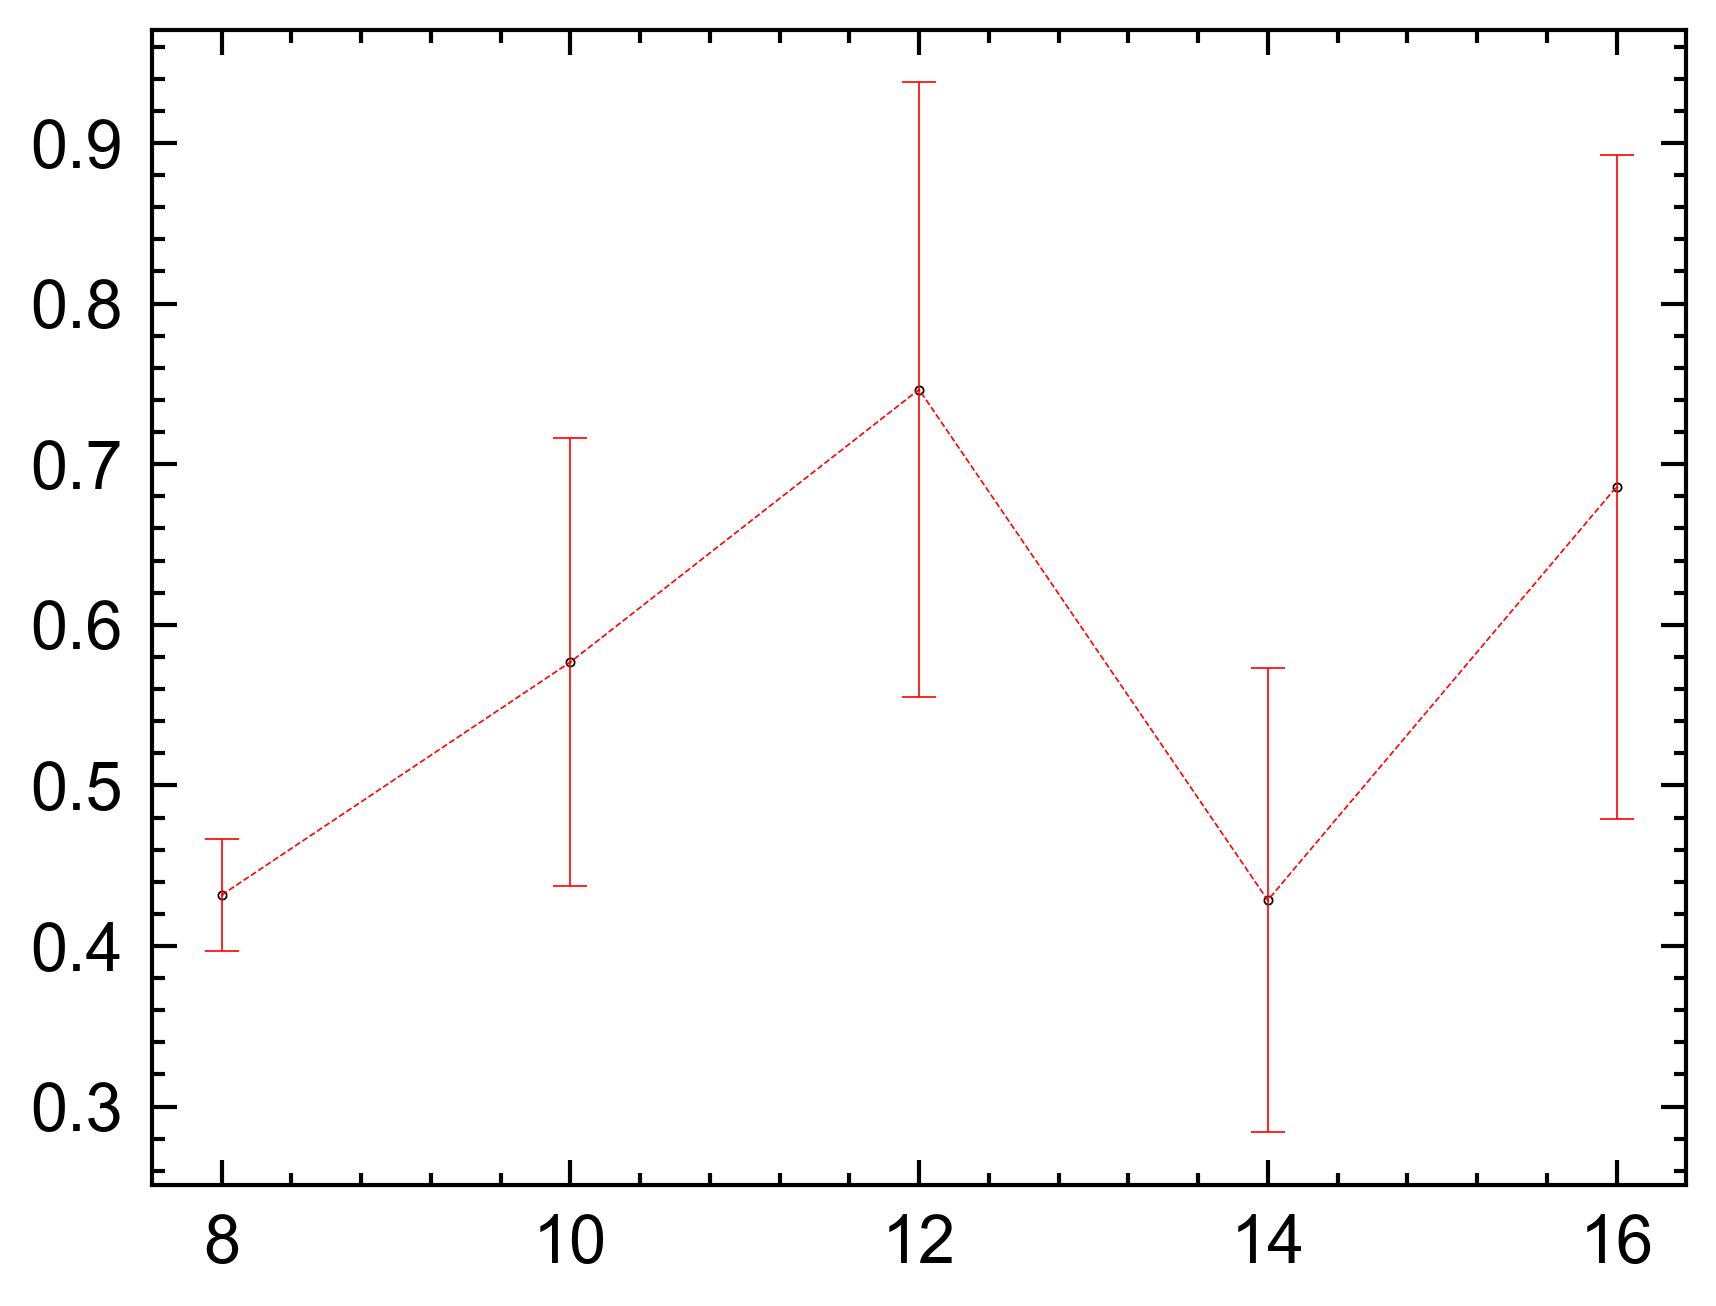

In [68]:
x_nodes = ['8','10','12','14','16']
plt.plot(x_nodes, average_acc_nodes, 'o', markersize = 0.2)
plt.errorbar(x_nodes, average_acc_nodes,yerr= std_nodes,  linewidth = 0.2, capsize= 2, capthick=0.2)



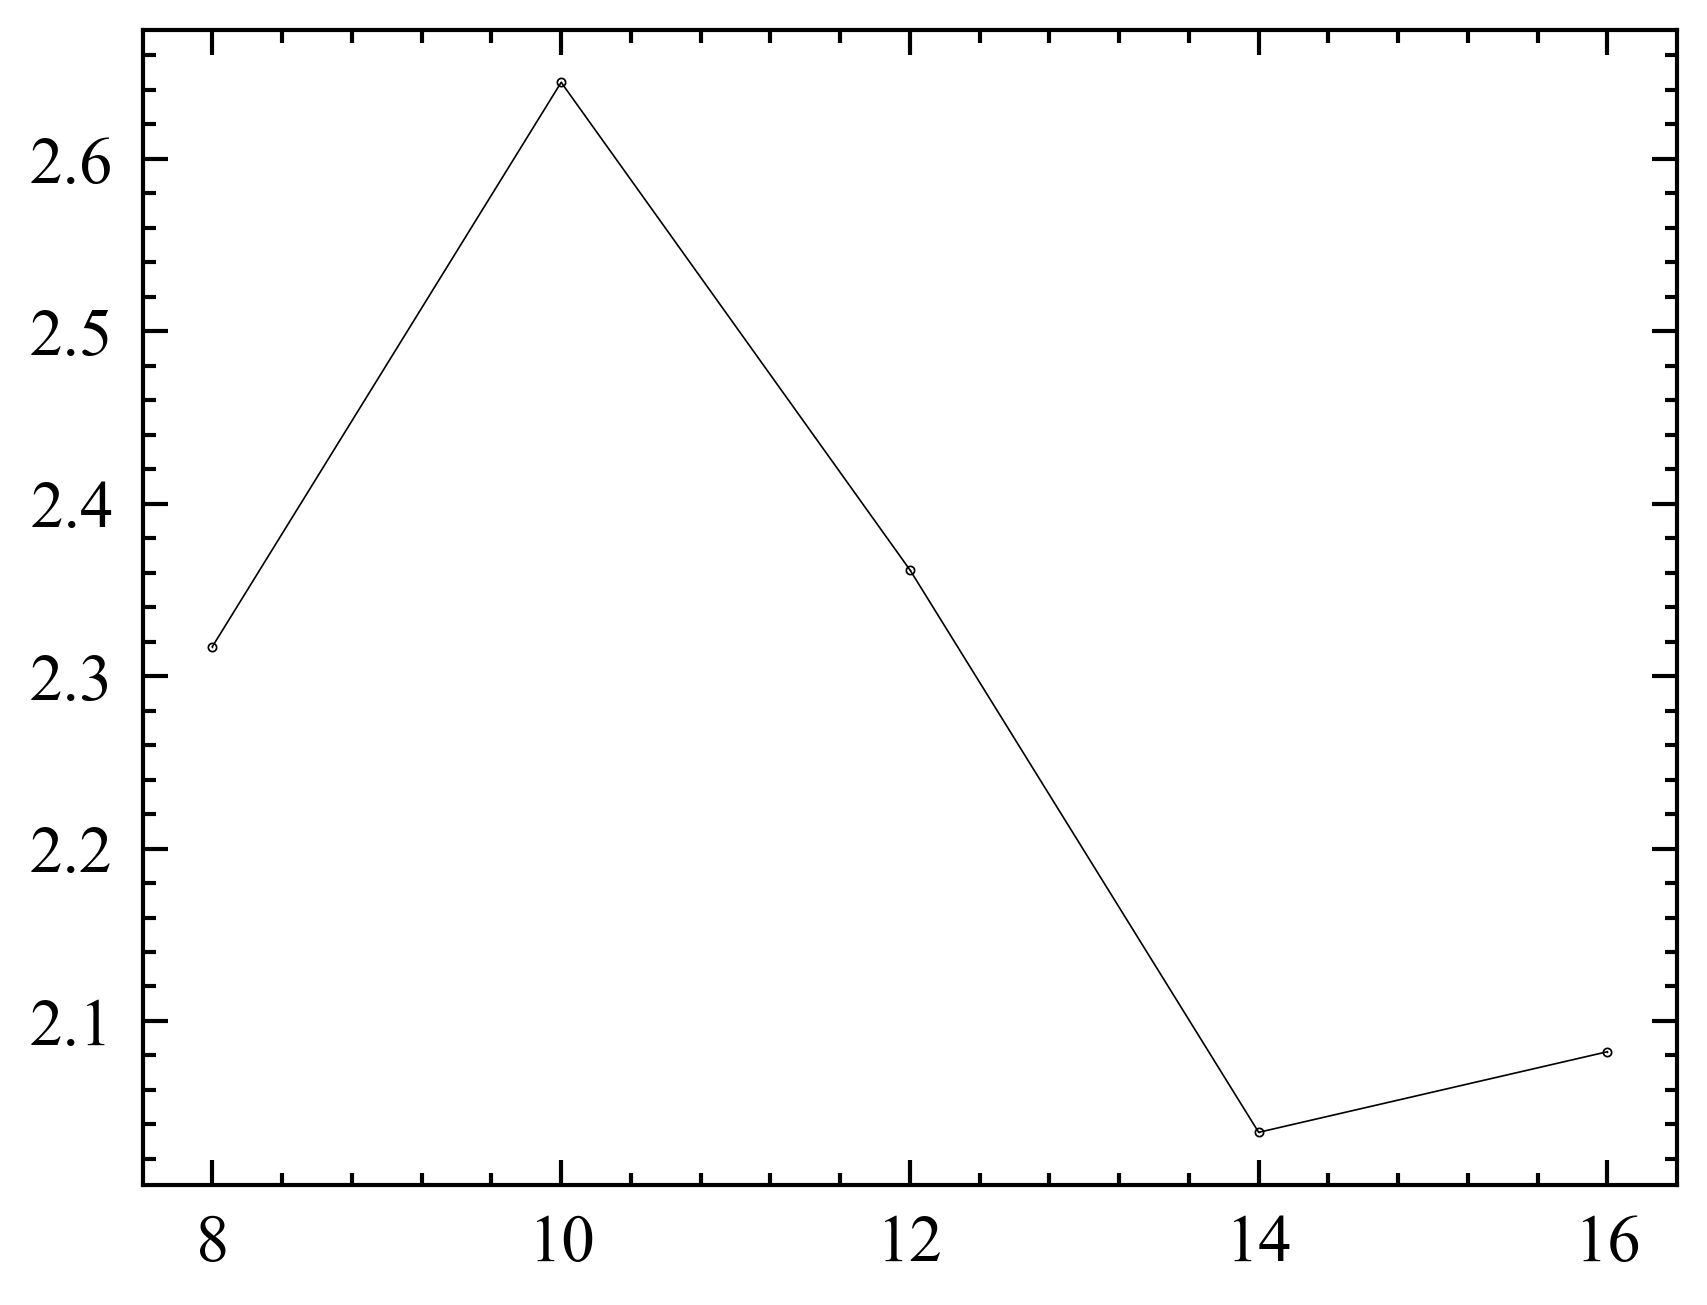

In [142]:

plt.plot(x_nodes, time_of_nodes, '-', linewidth = 0.2)
plt.plot(x_nodes, time_of_nodes, 'o', markersize = 0.2, c = 'black')

Text(0.5, 0, 'Node number layer 1')

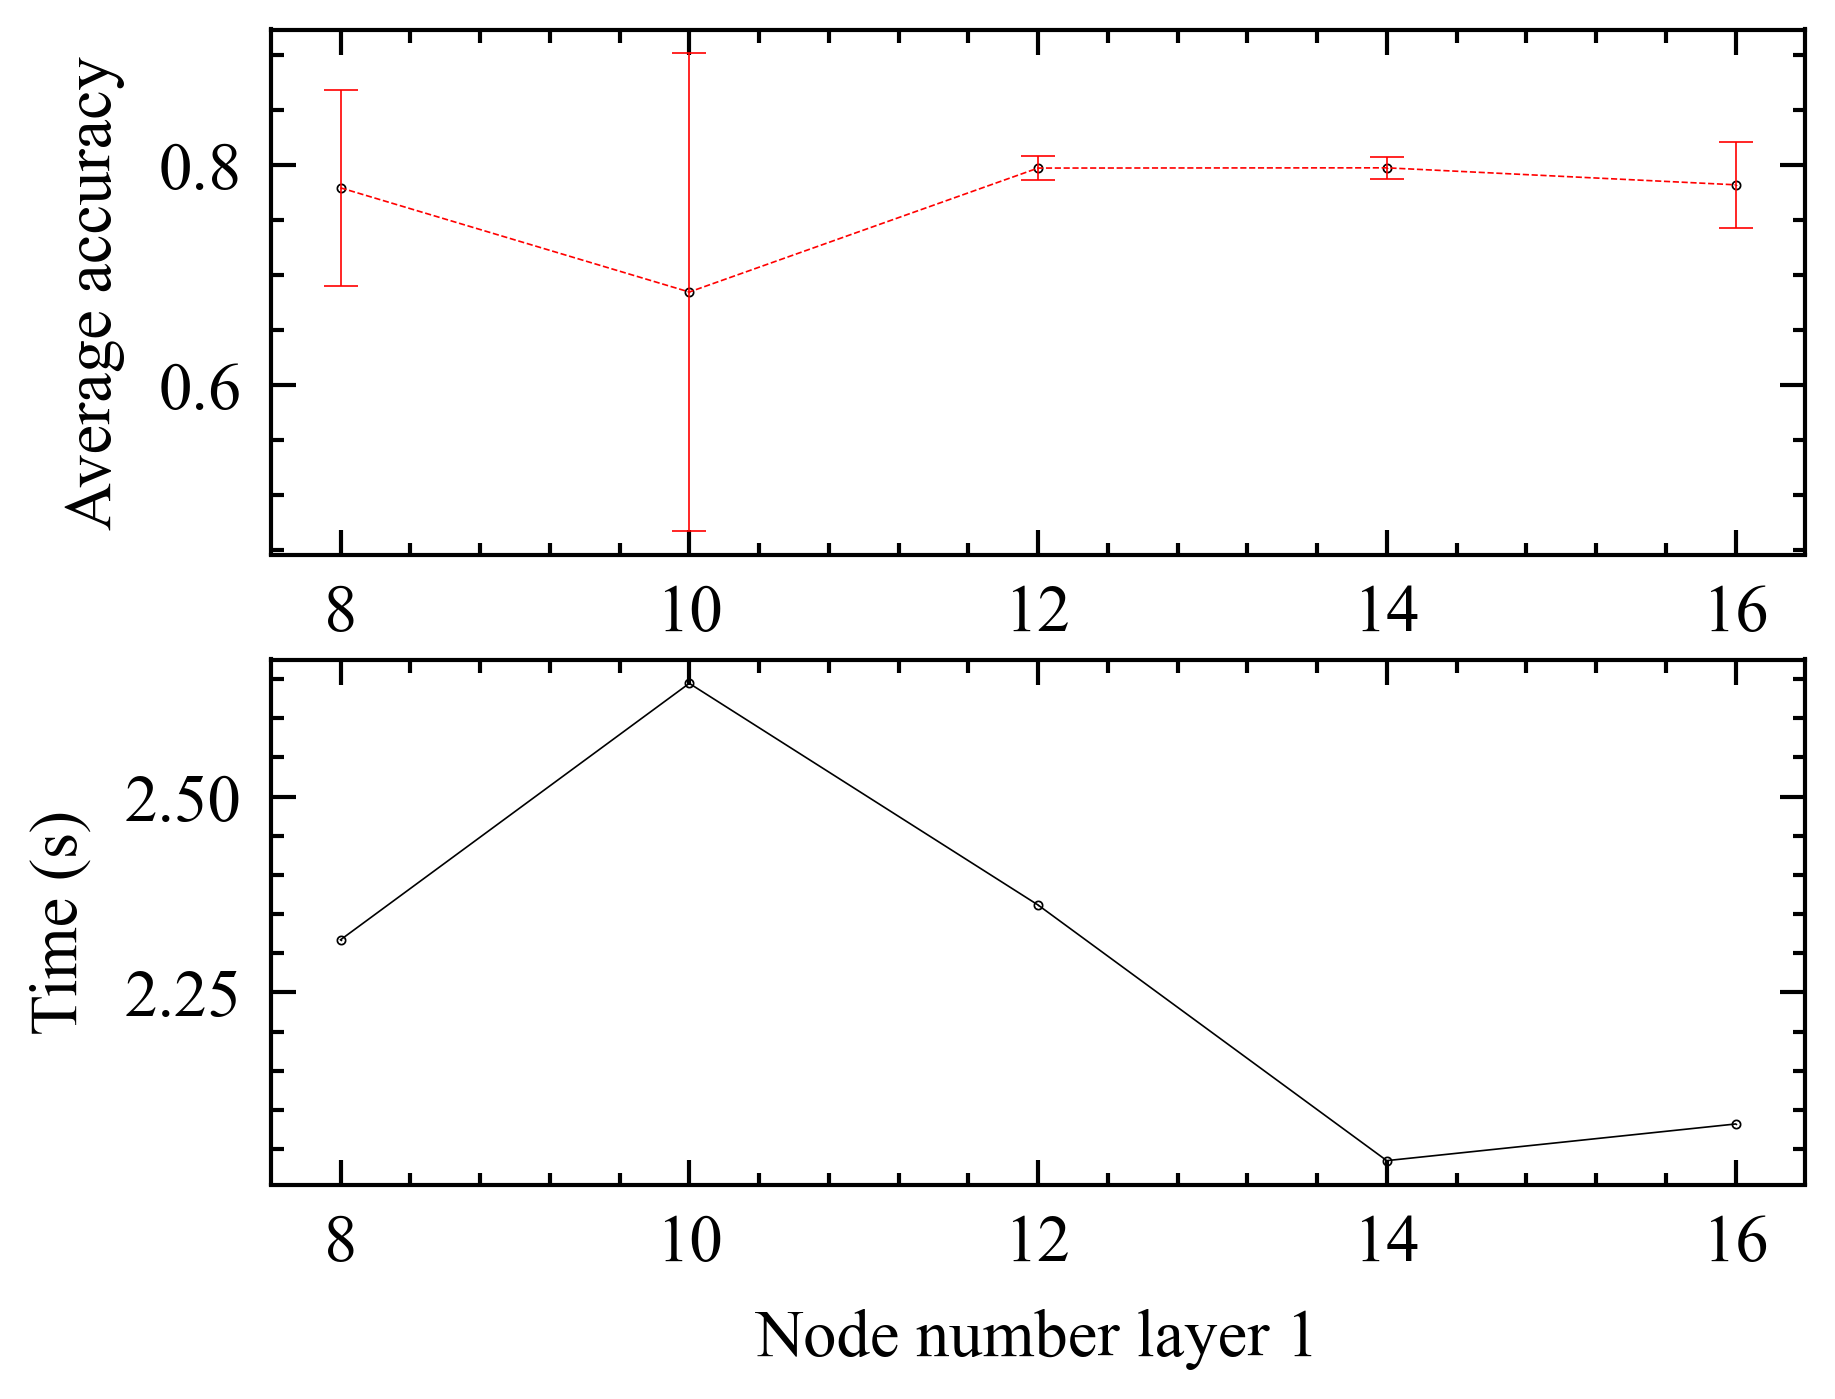

In [152]:
plt.subplot(2,1,1)
plt.plot(x_nodes, average_acc_nodes, 'o', markersize = 0.2)
plt.errorbar(x_nodes, average_acc_nodes,yerr= std_nodes,  linewidth = 0.2, capsize= 2, capthick=0.2)
plt.ylabel('Average accuracy')

plt.subplot(2,1,2)
plt.plot(x_nodes, time_of_nodes, '-', linewidth = 0.2)
plt.plot(x_nodes, time_of_nodes, 'o', markersize = 0.2, c = 'black')
plt.ylabel('Time (s)')
plt.xlabel('Node number  for layer 1')

In [153]:
average_acc_nodes_20 = []


for i in range(len(hist_node2)):
    acc = hist_node2[i].history['accuracy']
    dummy_acc = []
    
    for val in acc:
        dummy_acc.append(val)
    
    acc = dummy_acc
    average_acc_nodes_20.append(acc)


Text(0, 0.5, 'Accuracy')

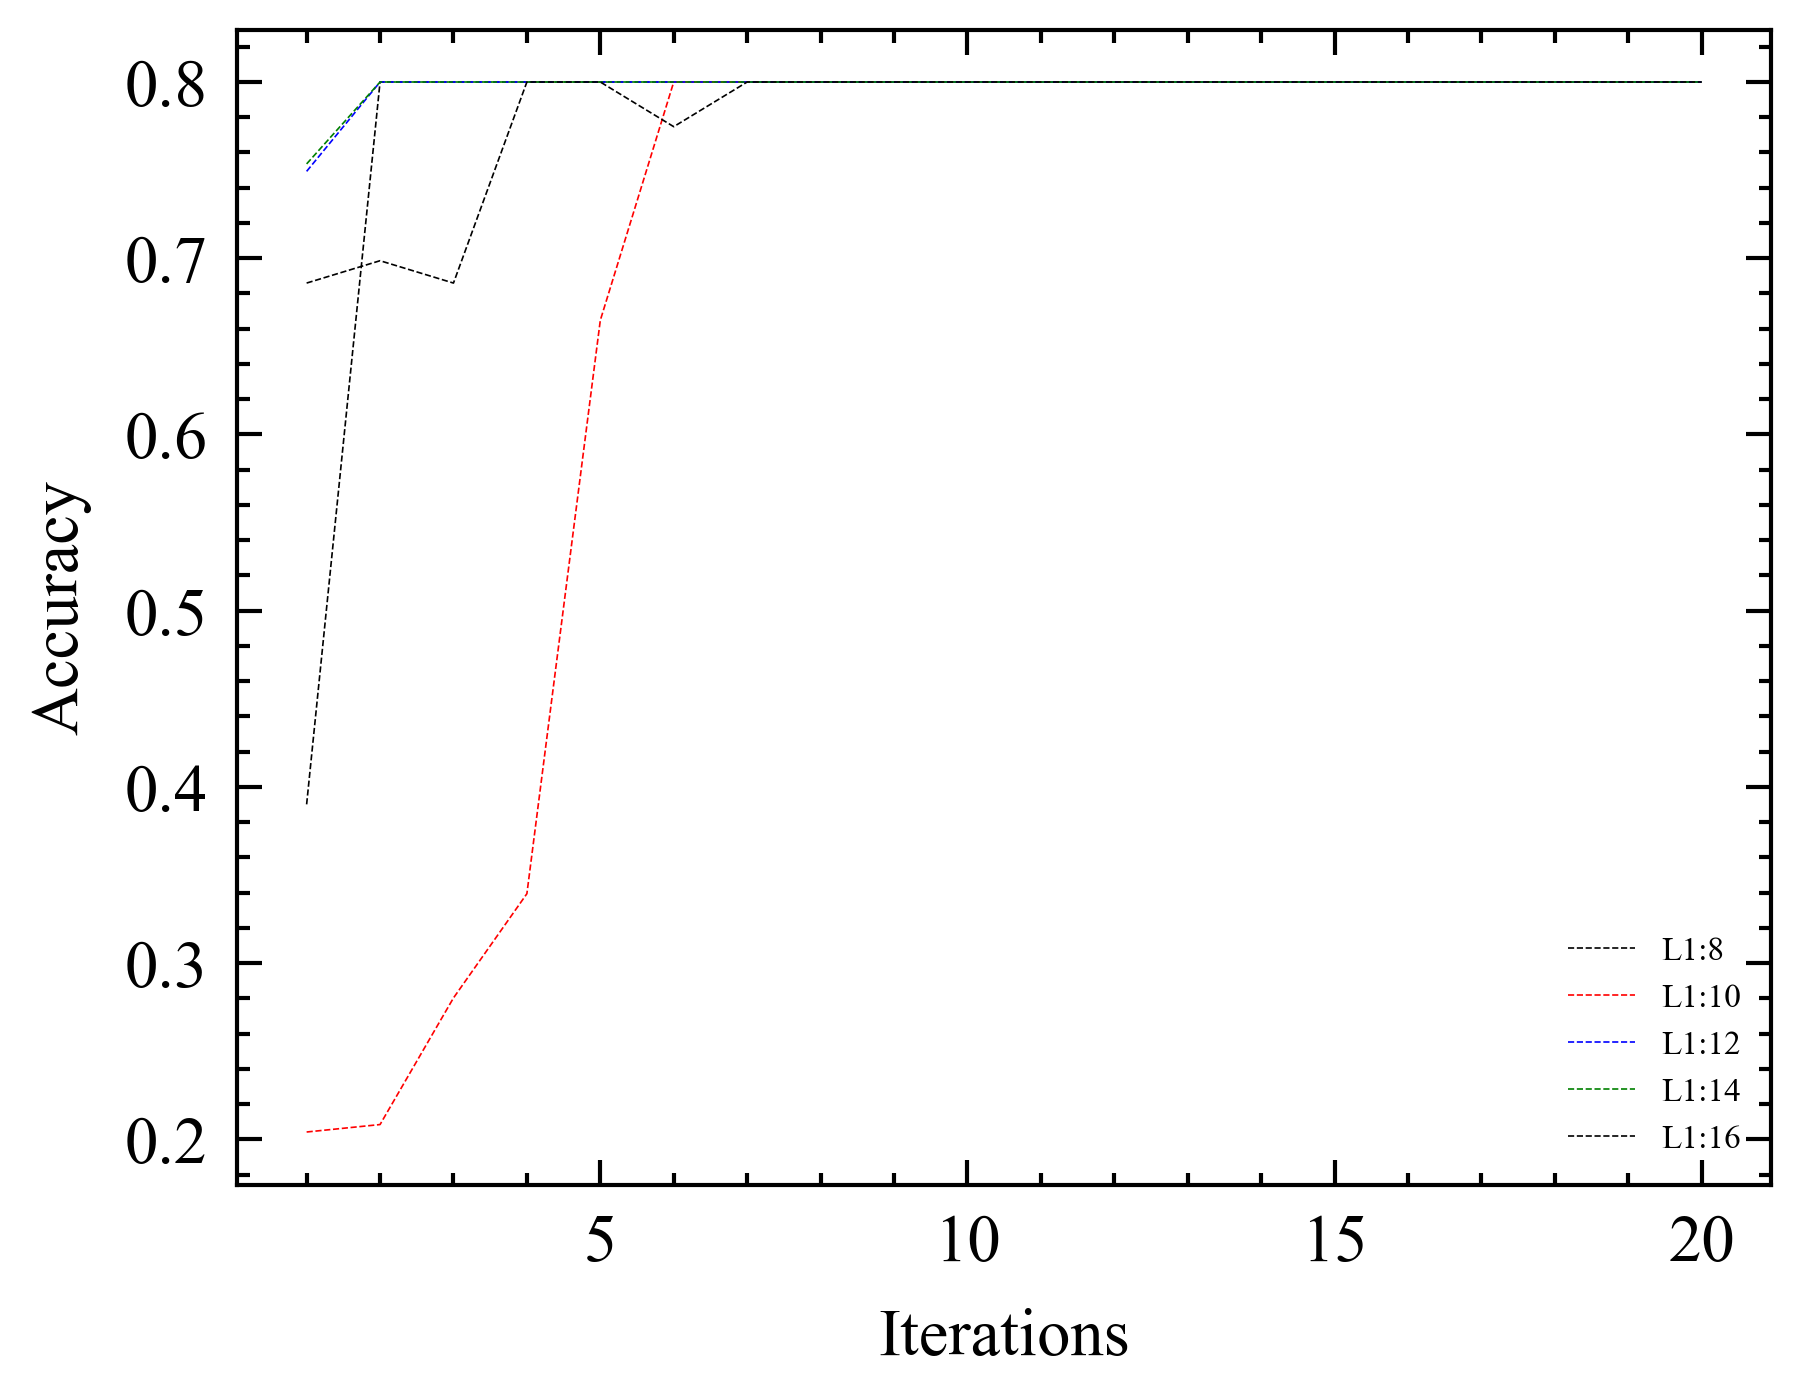

In [160]:
it = np.linspace(1,20,20)
plt.plot(it, average_acc_nodes_20[0], '--', label = 'L1:8', linewidth = 0.2)
plt.plot(it, average_acc_nodes_20[1], '--', label = 'L1:10', linewidth = 0.2)
plt.plot(it, average_acc_nodes_20[2], '--', label = 'L1:12', linewidth = 0.2)
plt.plot(it, average_acc_nodes_20[3], '--', label = 'L1:14', linewidth = 0.2)
plt.plot(it, average_acc_nodes_20[4], '--', label = 'L1:16', linewidth = 0.2)
plt.legend(prop = {'size':4})
plt.xlabel('Iterations')
plt.ylabel('Accuracy')

### 2. Finding the best Optimizer function (100 and 500 epochs)

In [72]:
def NN_optimiser_variation(model1, input1, ephs, X_t, y_t, X_test, y_test, node1, node2, opt):
    maxlen = 100 
    model = model1
    model.add(layers.Dense(node1, input_dim = input1, activation  = 'relu'))
    model.add(layers.Dense(node2, input_dim = input1, activation  = 'relu'))
    model.add(layers.Dense(5,activation = 'softmax'))
    model.add(layers.Flatten())
    model.compile(loss= 'categorical_crossentropy', optimizer= opt, metrics= ['accuracy'])
    model.build(input1)
    model.summary()
    history = model.fit(X_t,y_t,epochs = ephs, verbose=True, validation_data=(X_test, y_test), batch_size=30 )
    return history


def NN_data_invest_opt(X, y, tsize, epoch_no, node1, node2, opt):
    X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y , train_size = tsize, shuffle = True )
    input = X_train_b.shape[1] 
    nn1 = NN_optimiser_variation(Sequential(), input, epoch_no, X_train_b, y_train_b, X_test_b, y_test_b, node1, node2, opt)
    return nn1


In [82]:
opti = ['Adam', 'Adadelta', 'rmsprop', 'Adagrad', 'SGD']

acc_opt = []
loss_opt = []
valloss_opt = []

for i in opti:
    hist= NN_data_invest_opt(X_y1y2_bow_al, y_y1y2_bow_al,0.8,100, 12,8, i)
    acc_opt.append(hist.history['accuracy'])
    loss_opt.append(hist.history['loss'])
    valloss_opt.append(hist.history['val_loss'])


df_opt = pd.DataFrame({'optimiser': opti, 'accuracy':acc_opt, 'loss': loss_opt, 'val_loss': valloss_opt})

df_opt_variation = utils.save_as_pickle_file(df_opt,'W10_100ephs_best_optimiser', dir_name_e)
df_opt = utils.load_pickle_file_to_df('W10_100ephs_best_optimiser', dir_name_e)

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_177 (Dense)           (None, 12)                90768     
                                                                 
 dense_178 (Dense)           (None, 8)                 104       
                                                                 
 dense_179 (Dense)           (None, 5)                 45        
                                                                 
 flatten_59 (Flatten)        (None, 5)                 0         
                                                                 
Total params: 90,917
Trainable params: 90,917
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 [==============================] - 1s 57ms/step - loss: 1.8955 - accuracy: 0.1690 - val_loss: 1.5742 - val_accuracy: 0.2500
Epoch 2/100
5/5 [========================

### Batch size investigation

In [83]:
def NN_optimiser_variation(model1, input1, ephs, X_t, y_t, X_test, y_test, batch):
    maxlen = 100 
    model = model1
    model.add(layers.Dense(12, input_dim = input1, activation  = 'relu'))
    model.add(layers.Dense(8, input_dim = input1, activation  = 'relu'))
    model.add(layers.Dense(5,activation = 'softmax'))
    model.add(layers.Flatten())
    model.compile(loss= 'categorical_crossentropy', optimizer= 'Adam', metrics= ['accuracy'])
    model.build(input1)
    model.summary()
    history = model.fit(X_t,y_t,epochs = ephs, verbose=True, validation_data=(X_test, y_test), batch_size=30 )
    return history


def NN_data_invest_batch(X, y, tsize, epoch_no, batch):
    X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y , train_size = tsize, shuffle = True )
    input = X_train_b.shape[1] 
    nn1 = NN_optimiser_variation(Sequential(), input, epoch_no, X_train_b, y_train_b, X_test_b, y_test_b,batch)
    return nn1

In [94]:
Batchsize = [10,20,30,40]
Batchsize2 = [28,30,32,34,36]

acc = []
loss = []
val_loss = []

for i in Batchsize:
    df_bow_al_batch = NN_data_invest_batch(X_y1y2_bow_al, y_y1y2_bow_al,0.8, 100, i)
    acc.append(df_bow_al_batch.history['accuracy'])
    loss.append(df_bow_al_batch.history['loss'])
    val_loss.append(df_bow_al_batch.history['val_loss'])


acc2 = []
loss2 = []
val_loss2 = []
for i in Batchsize2:
    df_batch = NN_data_invest_batch(X_y1y2_bow_al, y_y1y2_bow_al,0.8, 100, i)
    acc2.append(df_batch.history['accuracy'])
    loss2.append(df_batch.history['loss'])
    val_loss2.append(df_batch.history['val_loss'])





Model: "sequential_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_222 (Dense)           (None, 12)                90768     
                                                                 
 dense_223 (Dense)           (None, 8)                 104       
                                                                 
 dense_224 (Dense)           (None, 5)                 45        
                                                                 
 flatten_74 (Flatten)        (None, 5)                 0         
                                                                 
Total params: 90,917
Trainable params: 90,917
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 [==============================] - 1s 79ms/step - loss: 1.8149 - accuracy: 0.2606 - val_loss: 1.7916 - val_accuracy: 0.1111
Epoch 2/100
5/5 [========================

In [95]:
df_batch = pd.DataFrame({'batchsize': Batchsize, 'accuracy': acc, 'loss': loss, 'val_loss': val_loss})
df_batch_smaller = pd.DataFrame({'batchsize': Batchsize2, 'accuracy': acc2, 'loss': loss2, 'val_loss': val_loss2})


In [96]:
df_batch_big = utils.save_as_pickle_file(df_batch,'W10_optimisation_100epochs_batchsize_big_10_to_40', dir_name_e)
df_batch_smaller = utils.save_as_pickle_file(df_batch_smaller,'W10_optimisation_100epochs_batchsize_small_10_to_40', dir_name_e)

In [98]:
df_unpickle_big_batch= utils.load_pickle_file_to_df('W10_optimisation_100epochs_batchsize_big_10_to_40', dir_name_e)
df_unpickle_small_batch= utils.load_pickle_file_to_df('W10_optimisation_100epochs_batchsize_small_10_to_40', dir_name_e)

Text(0.5, 0, 'Batchsize')

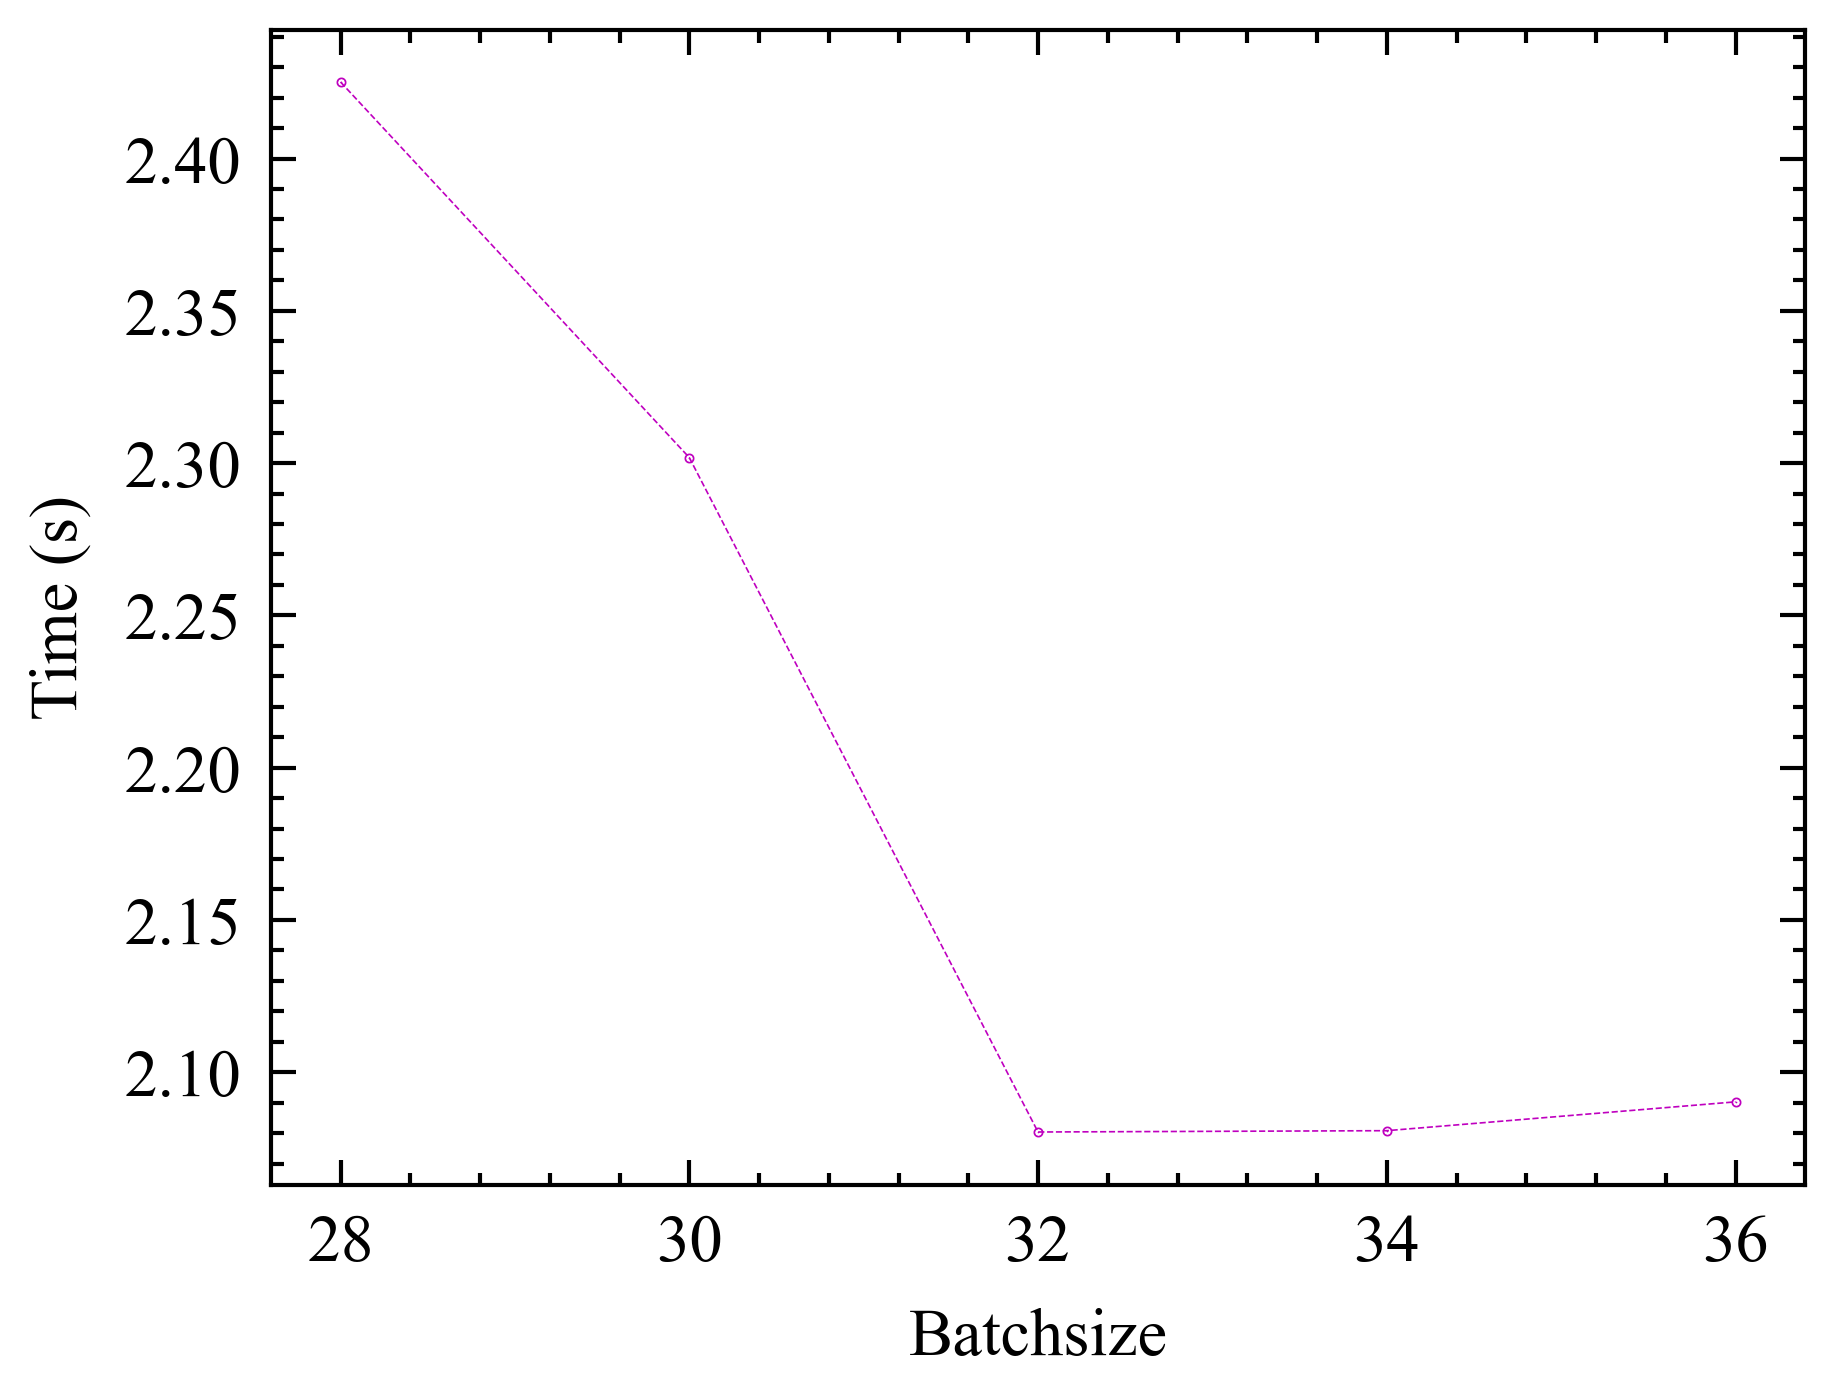

In [131]:
x2 = ['28','30','32','34','36']
plt.plot(x2, df_unpickle_bow_al_batch['times'], '--', linewidth = 0.2, c = 'm')
plt.plot(x2, df_unpickle_bow_al_batch['times'], 'o', markersize = 0.2, c = 'm')
plt.ylabel('Time (s)')
plt.xlabel('Batchsize')

### Learning rate

In [59]:

from matplotlib import pyplot

In [62]:

from NN_tools import NN_opt_lr



In [61]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_y1y2_bow_al, y_y1y2_bow_al, train_size = 0.8)
print(X_train_b.shape[1])
type(X_train_b.shape[1])

7563


int

In [63]:

learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]

lr_array = []
for i in range(len(learning_rates)):
    lr = NN_opt-lr(Sequential(), X_train_b.shape[1], 100, X_train_b, y_train_b, X_test_b, y_test_b, 12, 8, 1, i)
    lr_array.append(lr)

Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_216 (Dense)           (None, 12)                90768     
                                                                 
 dense_217 (Dense)           (None, 8)                 104       
                                                                 
 dense_218 (Dense)           (None, 1)                 9         
                                                                 
 flatten_72 (Flatten)        (None, 1)                 0         
                                                                 
Total params: 90,881
Trainable params: 90,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 [==============================] - 1s 76ms/step - loss: 1.0987 - accuracy: 0.8000 - val_loss: 1.1515 - val_accuracy: 0.8000
Epoch 2/100
5/5 [========================

In [91]:
from scipy.stats import sem
average_acc = []
std        = []

for i in range(len(lr_array)):
    acc = lr_array[i].history['accuracy']
    dummy_acc = []
    
    for val in acc:
        dummy_acc.append(val)
    
    acc = np.sum(dummy_acc)/len(dummy_acc)
    error2  = np.std(dummy_acc)
    average_acc.append(acc)
    std.append(error2)

average_acc = np.flip(average_acc)
print(average_acc)
print(learning_rates)


[0.20126762 0.20126762 0.79873247 0.20126762 0.79873247 0.79873247
 0.79919725 0.80000007]
[1.0, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07]


Text(0, 0.5, ' Accuracy')

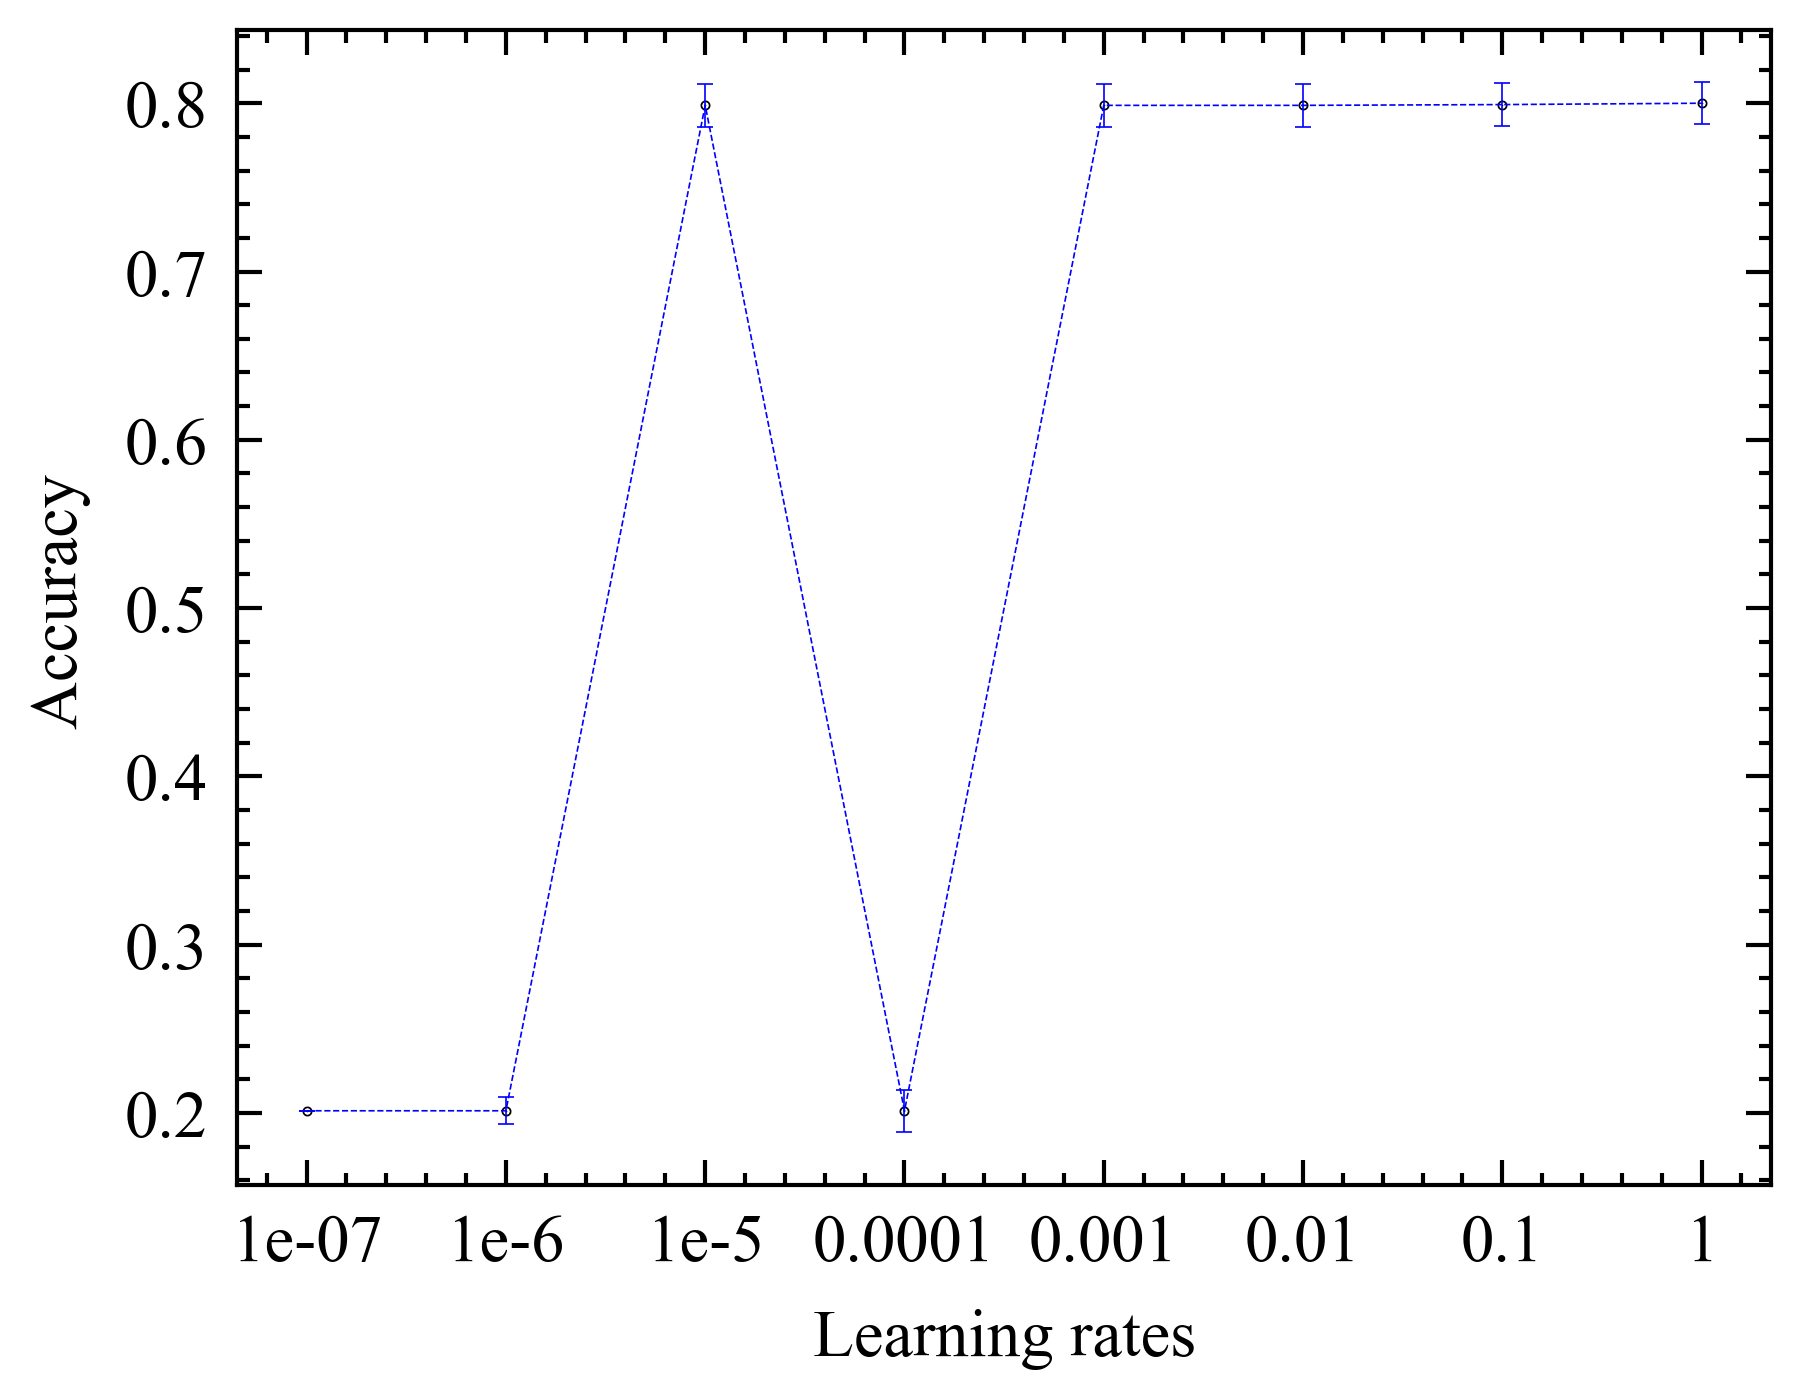

In [93]:
learning_rates = ['1e-07', '1e-6', '1e-5','0.0001','0.001', '0.01', '0.1','1']

plt.plot(learning_rates, average_acc,'o',  markersize = 0.2)
plt.errorbar(learning_rates, average_acc, yerr= std, linewidth = 0.2, capsize = 1, capthick=0.2, c = 'b')
plt.xlabel('Learning rates')
plt.ylabel(' Accuracy')

In [ ]:
from sklearn.utils.multiclass import type_of_target
type_of_target(y_y1y2_bow_al)
y_y1y2_bow_al = np.argmax(y_y1y2_bow_al, axis = 1)
#print(y_y1y2_bow_al)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_y1y2_bow_al, y_y1y2_bow_al , train_size = 0.7, random_state = 1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8

# Optimal number of model iterations 

In [11]:
def NN_data_iteration_investigation(X, y, epoch_no,it_no, ts):
    accuracy = []
    loss     = []
    val_loss = []
    accuracy_sem = []

    dummy= []
    dummy_loss     = []
    dummy_val_loss = []
    
    X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y , train_size = ts, shuffle=True)
    input = X_train_b.shape[1]
    for iteration in it_no:
        model = NN_optimised_parameters_al(Sequential(), input, epoch_no, X_train_b, y_train_b, X_test_b, y_test_b)
        history = model.fit(X_train_b,y_train_b,epochs = epoch_no, verbose=True, validation_data=(X_test_b, y_test_b), batch_size=30 )

        dummy.append(history.history['accuracy'])
        dummy_loss.append(history.history['loss'])
        dummy_val_loss.append(history.history['loss'])


    for no in range(len(dummy)):
        accuracy.append(np.sum(dummy[no])/len(dummy[no]))
        accuracy_sem.append(np.sum(sem(dummy[no]))/len(dummy[no]))
        loss.append(np.sum(dummy_loss[no])/len(dummy[no]))
        val_loss.append(np.sum(dummy_val_loss[no])/len(dummy[no]))

    dictionary = {'iteration_no': it_no,'accuracy':accuracy, 'sem':accuracy_sem, 'loss': loss, 'val_loss':val_loss}
    df = pd.DataFrame(dictionary)
    return df

In [12]:
Best_iter_df = NN_data_iteration_investigation(X_y1y2_bow_al, y_y1y2_bow_al, 100, [10,20,30,40,50,60], 0.8)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                90768     
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 5)                 45        
                                                                 
 flatten (Flatten)           (None, 5)                 0         
                                                                 
Total params: 90,917
Trainable params: 90,917
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 [==============================] - 1s 74ms/step - loss: 2.1356 - accuracy: 0.3310 - val_loss: 1.6059 - val_accuracy: 0.4722
Epoch 2/100
5/5 [===========================

In [14]:
print(Best_iter_df)

   iteration_no  accuracy       sem      loss  val_loss
0            10  0.372817  0.000004  1.523521  1.523521
1            20  0.932676  0.000153  0.205860  0.205860
2            30  0.913099  0.000145  0.270375  0.270375
3            40  0.921690  0.000175  0.227023  0.227023
4            50  0.892746  0.000180  0.380789  0.380789
5            60  0.870282  0.000194  0.354537  0.354537


In [13]:
# save iteration file for graphs 
df_iteration_pickle = utils.save_as_pickle_file(Best_iter_df, 'W11_NN_investigation_best iteration_number', dir_name_e)
unpickled_df_iteration = utils.load_pickle_file_to_df( 'W11_NN_investigation_best iteration_number', dir_name_e)

# Finding the Best ANN hyperparameters using GridSearch CV

###### Code snippet adapted from: https://thinkingneuron.com/how-to-use-artificial-neural-networks-for-classification-in-python/

In [99]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [100]:
# Function to generate Deep ANN model

from NN_tools import NN_tune

In [101]:
# creating the Grid search space
# parameter trials

Parameter_Trials = { 'batch_size':[26,28,30,32,34],
                        'epochs':[5,10,20,30],
                        'Optimizer_Trial': ['adam', 'rmsprop', 'Adagrad'], 
                        'Neurons_Trial':[6,8,10,12,14]
                        }


In [106]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_y1y2_bow_al, y_y1y2_bow_al , train_size = 0.8, shuffle=True )
input = X_train_b.shape[1]
# Function to generate Deep ANN model 
def make_classification_ann(Optimizer_Trial, Neurons_Trial):
    from keras.models import Sequential
    from keras.layers import Dense
    
    # Creating the classifier ANN model
    classifier = Sequential()
    classifier.add(Dense(units=Neurons_Trial, input_dim=input, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=Neurons_Trial, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=5, kernel_initializer='uniform', activation='sigmoid'))
    classifier.compile(optimizer=Optimizer_Trial, loss='categorical_crossentropy', metrics=['accuracy'])
            
    return classifier


In [107]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

classifier = KerasRegressor(build_fn = NN_tune)

C:\Users\EfiaA\AppData\Local\Temp\ipykernel_21896\2846688209.py:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasRegressor(build_fn = NN_tune)


In [108]:
grid_search = GridSearchCV(estimator=classifier, param_grid= Parameter_Trials)

In [109]:
#Measuring how much time it took to find the best params

import time
StartTime = time.time()

grid_search.fit(X_train_b, y_train_b)

EndTime = time.time()
print('############ Total time Taken:', round(EndTime-StartTime/60), 'Minutes #################')

# printing the best parameters
print('\n##### Best hyperparameters ####')
grid_search.best_params_


ValueError: 
All the 1500 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1500 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\EfiaA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\EfiaA\AppData\Roaming\Python\Python38\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "c:\Users\EfiaA\OneDrive - Imperial College London\Imperial academic work\University life\Y4\MSci project\Project_Coding\nlp-physicseducation\NN_tools.py", line 543, in NN_tune
    model.add(layers.Dense(Neurons_Trial, input_dim = input, activation  = 'relu'))
  File "C:\Users\EfiaA\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\EfiaA\AppData\Roaming\Python\Python38\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "<string>", line 3, in raise_from
TypeError: Dimension value must be integer or None or have an __index__ method, got value '<bound method Kernel.raw_input of <ipykernel.ipkernel.IPythonKernel object at 0x000001952B7E1160>>' with type '<class 'method'>'


# Optimised Neural Network results 

In [124]:
def NN_invest(model1, input1, ephs, X_t, y_t, X_test, y_test, node1, node2, node3, opt,bsize):
    maxlen = 100 
    model = model1
    model.add(layers.Dense(node1, input_dim = input, activation  = 'relu'))
    model.add(layers.Dense(node2, input_dim = input, activation  = 'relu'))
    model.add(layers.Dense(node3 ,activation = 'sigmoid'))
    model.add(layers.Flatten())
    model.compile(loss= 'binary_crossentropy', optimizer= opt , metrics= ['accuracy'])
    model.build(input1)
    model.summary()
    history = model.fit(X_t,y_t,epochs = ephs, verbose=True, validation_data=(X_test, y_test), batch_size=bsize )
    return history



def NN_data_invest(X, y, tsize,  epoch_no, node1, node2, node3, opt, bsize):
    X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y , train_size = tsize )
    input = X_train_b.shape[1] 
    nn1 = NN_invest(Sequential(), input, epoch_no, X_train_b, y_train_b, X_test_b, y_test_b, node1, node2, node3, opt, bsize)
    return pd.DataFrame(nn1.history)
optimised_al_bow = NN_data_invest(X_y1y2_bow_al,y_y1y2_bow_al , 0.8,  20, 12, 8, 1, 'Rmsprop', 30)

In [125]:
optimised_al_bow = NN_data_invest(X_y1y2_bow_al,y_y1y2_bow_al , 0.8,  20, 12, 8, 1, 'Rmsprop', 30)

Model: "sequential_1524"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4572 (Dense)          (None, 12)                90768     
                                                                 
 dense_4573 (Dense)          (None, 8)                 104       
                                                                 
 dense_4574 (Dense)          (None, 1)                 9         
                                                                 
 flatten_1524 (Flatten)      (None, 1)                 0         
                                                                 
Total params: 90,881
Trainable params: 90,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
5/5 [==============================] - 2s 94ms/step - loss: 0.5527 - accuracy: 0.8000 - val_loss: 0.5224 - val_accuracy: 0.8000
Epoch 2/20
5/5 [========================

In [126]:
df_optimised_bow_al = utils.save_as_pickle_file(optimised_al_bow,'optimised_al_bow_y1y2_20ephs_12_8_1', dir_name_e)
df_unpickle_optimised_bow_al = utils.load_pickle_file_to_df('optimised_al_bow_y1y2_20ephs_12_8_1', dir_name_e)

<AxesSubplot: >

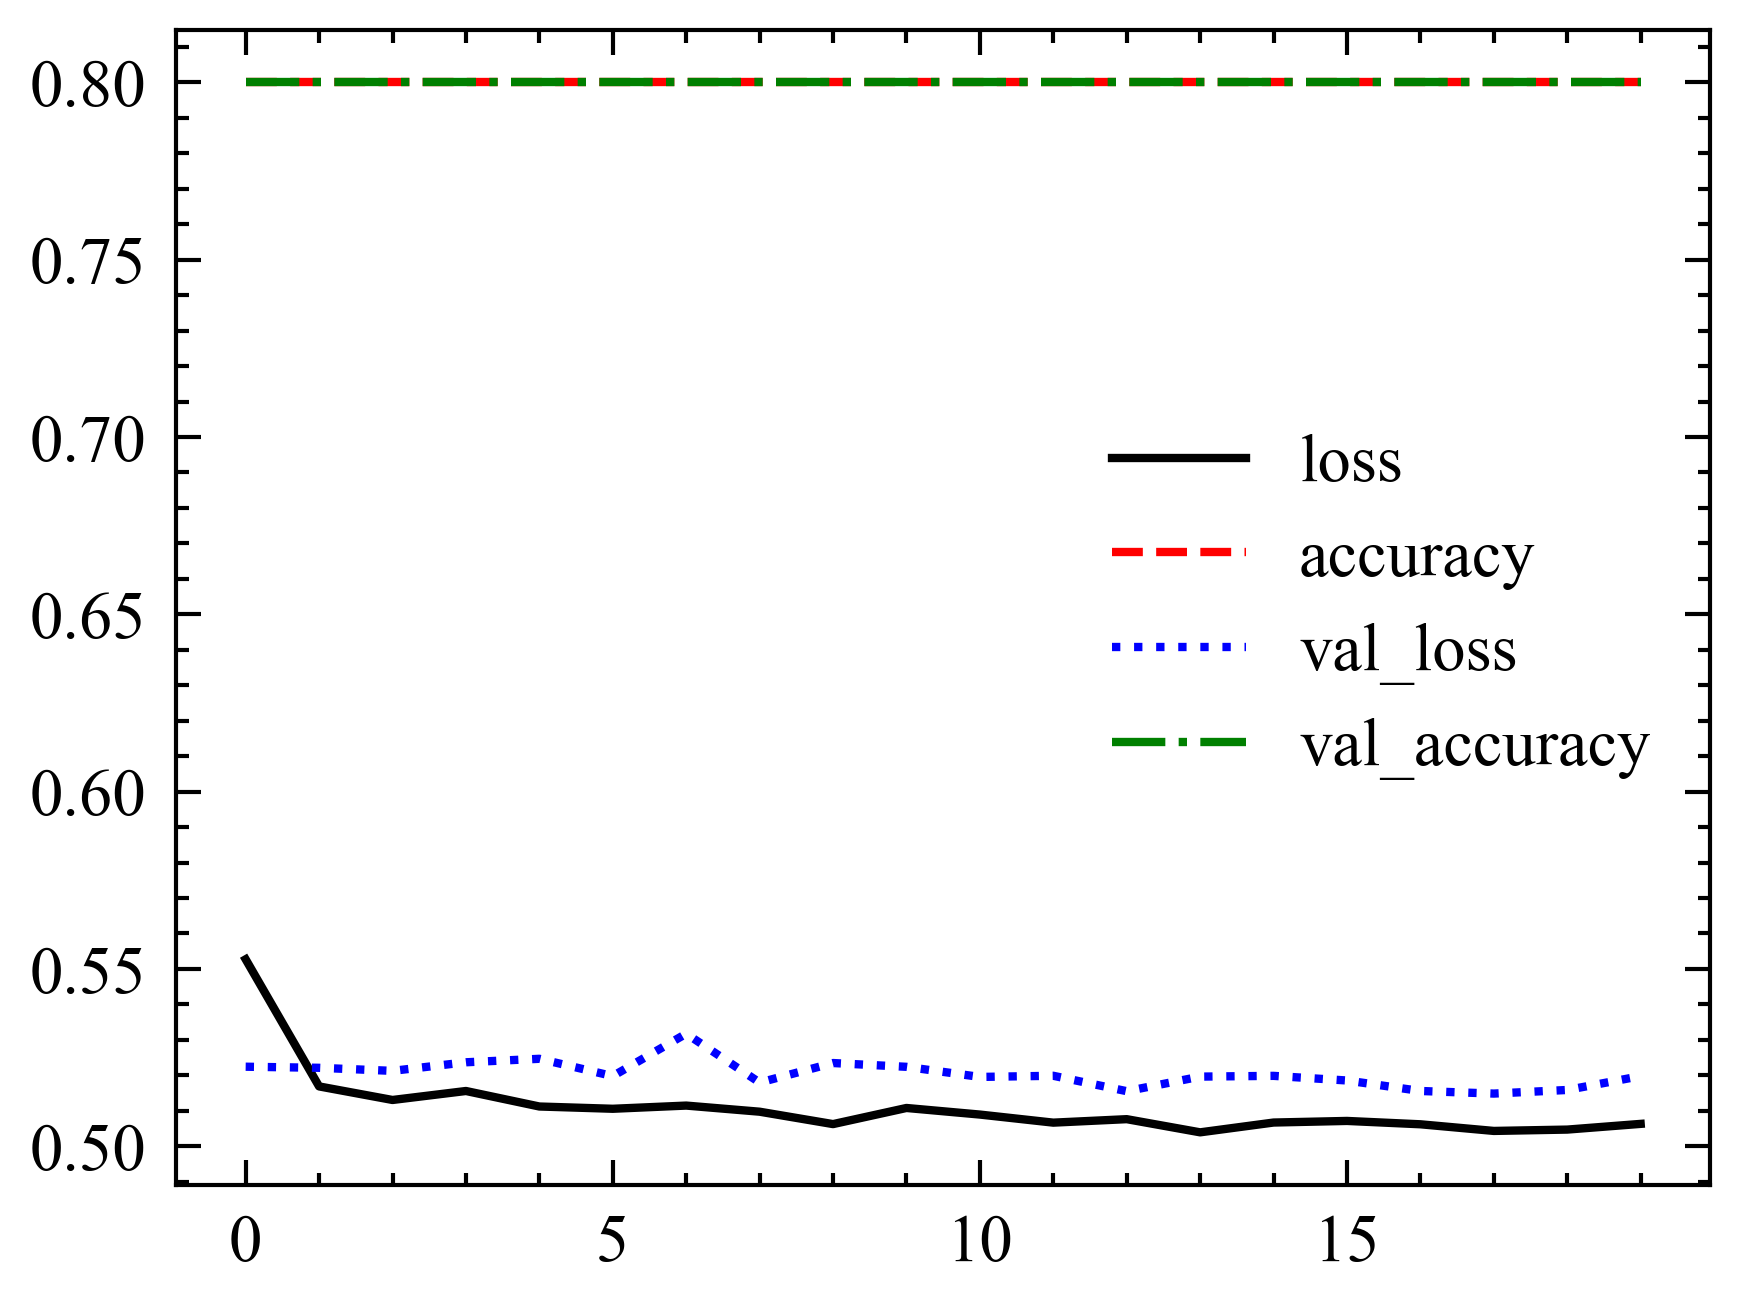

In [129]:
df_unpickle_optimised_bow_al.plot.line()

# Optimised y1y2 results 

In [23]:
def NN(model1, input1, ephs, X_t, y_t, X_test, y_test):
    maxlen = 100 
    model = model1
    model.add(layers.Dense(12, input_dim = input, activation  = 'relu'))
    model.add(layers.Dense(8, input_dim = input, activation  = 'relu'))
    model.add(layers.Dense(1,activation = 'sigmoid'))
    model.add(layers.Flatten())
    model.compile(loss= 'binary_crossentropy', optimizer= 'rmsprop', metrics= ['accuracy'])
    model.build(input1)
    model.summary()
    history = model.fit(X_t,y_t,epochs = ephs, verbose=True, validation_data=(X_test, y_test), batch_size=30 )
    return history



def NN_data(X, y,t_size,epoch_no, str_dataname,str_featext, str_year, dir):
    accuracies = []
    accuracies_sem = []
    loss = []
    val_loss = []
    dummy = []
    dummy_loss = []
    dummy_val_loss = []
    for i in t_size:
        X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y , train_size = i)
        input = X_train_b.shape[1]
        #input = len(y_train_b)
        nn1 = NN(Sequential(), input, epoch_no, X_train_b, y_train_b, X_test_b, y_test_b)
        dummy.append(nn1.history['accuracy'])
        dummy_loss.append(nn1.history['loss'])
        dummy_val_loss.append(nn1.history['loss'])


    for array in dummy:
        accuracies.append(np.sum(array)/len(array))
        accuracies_sem.append(sem(array))
    
    for array in dummy_loss:
        loss.append(np.sum(array)/len(array))
    
    for array in dummy_val_loss:
        val_loss.append(np.sum(array)/len(array))

    dict_rl = {'trainsize':t_size, 'accuracy':accuracies, 'sem': accuracies_sem, 'loss':loss, 'valloss': val_loss}
    acc_rl_bow = pd.DataFrame(dict_rl)
    utils.save_as_pickle_file(acc_rl_bow,'NN_{}_{}_{}_{}ephs_recent'. format(str_year, str_featext,str_dataname,'20'), dir)
    #name = 'NN_{}_{}_trainsize_accuracy_sem_{}ephs_{}'. format(str_dataname,str_featext,'20', str_year)
    return acc_rl_bow

In [27]:
ephs = 20 #no of epochs 
train_sizes = [0.5,0.6,0.7,0.8,0.9] 


# train nn for: Epistemology (reasoning level) data - tfidf - y1y2
opt_data_tf_rl = NN_data(X_y1y2_tf_rl, y_y1y2_tf_rl,train_sizes,ephs, 'EPISTEMOLOGY', 'TFIDF', 'y1y2', dir_name_e )

# train nn for: Epistemology (reasoning level) data - bow - y1y2
opt_data_bow_rl = NN_data(X_y1y2_bow_rl, y_y1y2_bow_rl, train_sizes, ephs, 'EPISTEMOLOGY', 'BOW', 'y1y2', dir_name_e )

# train nn for: Argument Level data - bow - y1y2
opt_data_bow_rl = NN_data(X_y1y2_bow_al, y_y1y2_bow_al, train_sizes, ephs, 'ARGUMENTLEVEL', 'BOW', 'y1y2', dir_name_e)

# train nn for Argument level data - tfidf - y1y2
opt_data_tf_rl = NN_data(X_y1y2_tf_al, y_y1y2_tf_al, train_sizes, ephs, 'ARGUMENTLEVEL', 'TFIDF', 'y1y2', dir_name_e)

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_156 (Dense)           (None, 12)                90768     
                                                                 
 dense_157 (Dense)           (None, 8)                 104       
                                                                 
 dense_158 (Dense)           (None, 1)                 9         
                                                                 
 flatten_52 (Flatten)        (None, 1)                 0         
                                                                 
Total params: 90,881
Trainable params: 90,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
3/3 [==============================] - 1s 152ms/step - loss: 0.6842 - accuracy: 0.7500 - val_loss: 0.6680 - val_accuracy: 0.7500
Epoch 2/20
3/3 [=========================

In [29]:
# Load pickled files 


# NN Dataframe: Epistemology - tfidf
df_unpic_opt_tf_rl = utils.load_pickle_file_to_df('NN_y1y2_TFIDF_EPISTEMOLOGY_20ephs_recent', dir_name_e)

# NN Dataframe: Epistemoogy - bow
df_unpic_opt_bow_rl = utils.load_pickle_file_to_df('NN_y1y2_BOW_EPISTEMOLOGY_20ephs_recent', dir_name_e)

# NN Dataframe: Argument level - bow 
df_unpic_opt_bow_al = utils.load_pickle_file_to_df('NN_y1y2_BOW_ARGUMENTLEVEL_20ephs_recent', dir_name_e)

# NN Dataframe: Argument level - tfidf
df_unpic_opt_tf_al = utils.load_pickle_file_to_df('NN_y1y2_TFIDF_ARGUMENTLEVEL_20ephs_recent', dir_name_e)


In [31]:
print(df_unpic_opt_tf_rl['accuracy'])

0    0.750000
1    0.743396
2    0.750000
3    0.744718
4    0.747656
Name: accuracy, dtype: float64


Text(0.5, 0, 'trainsize')

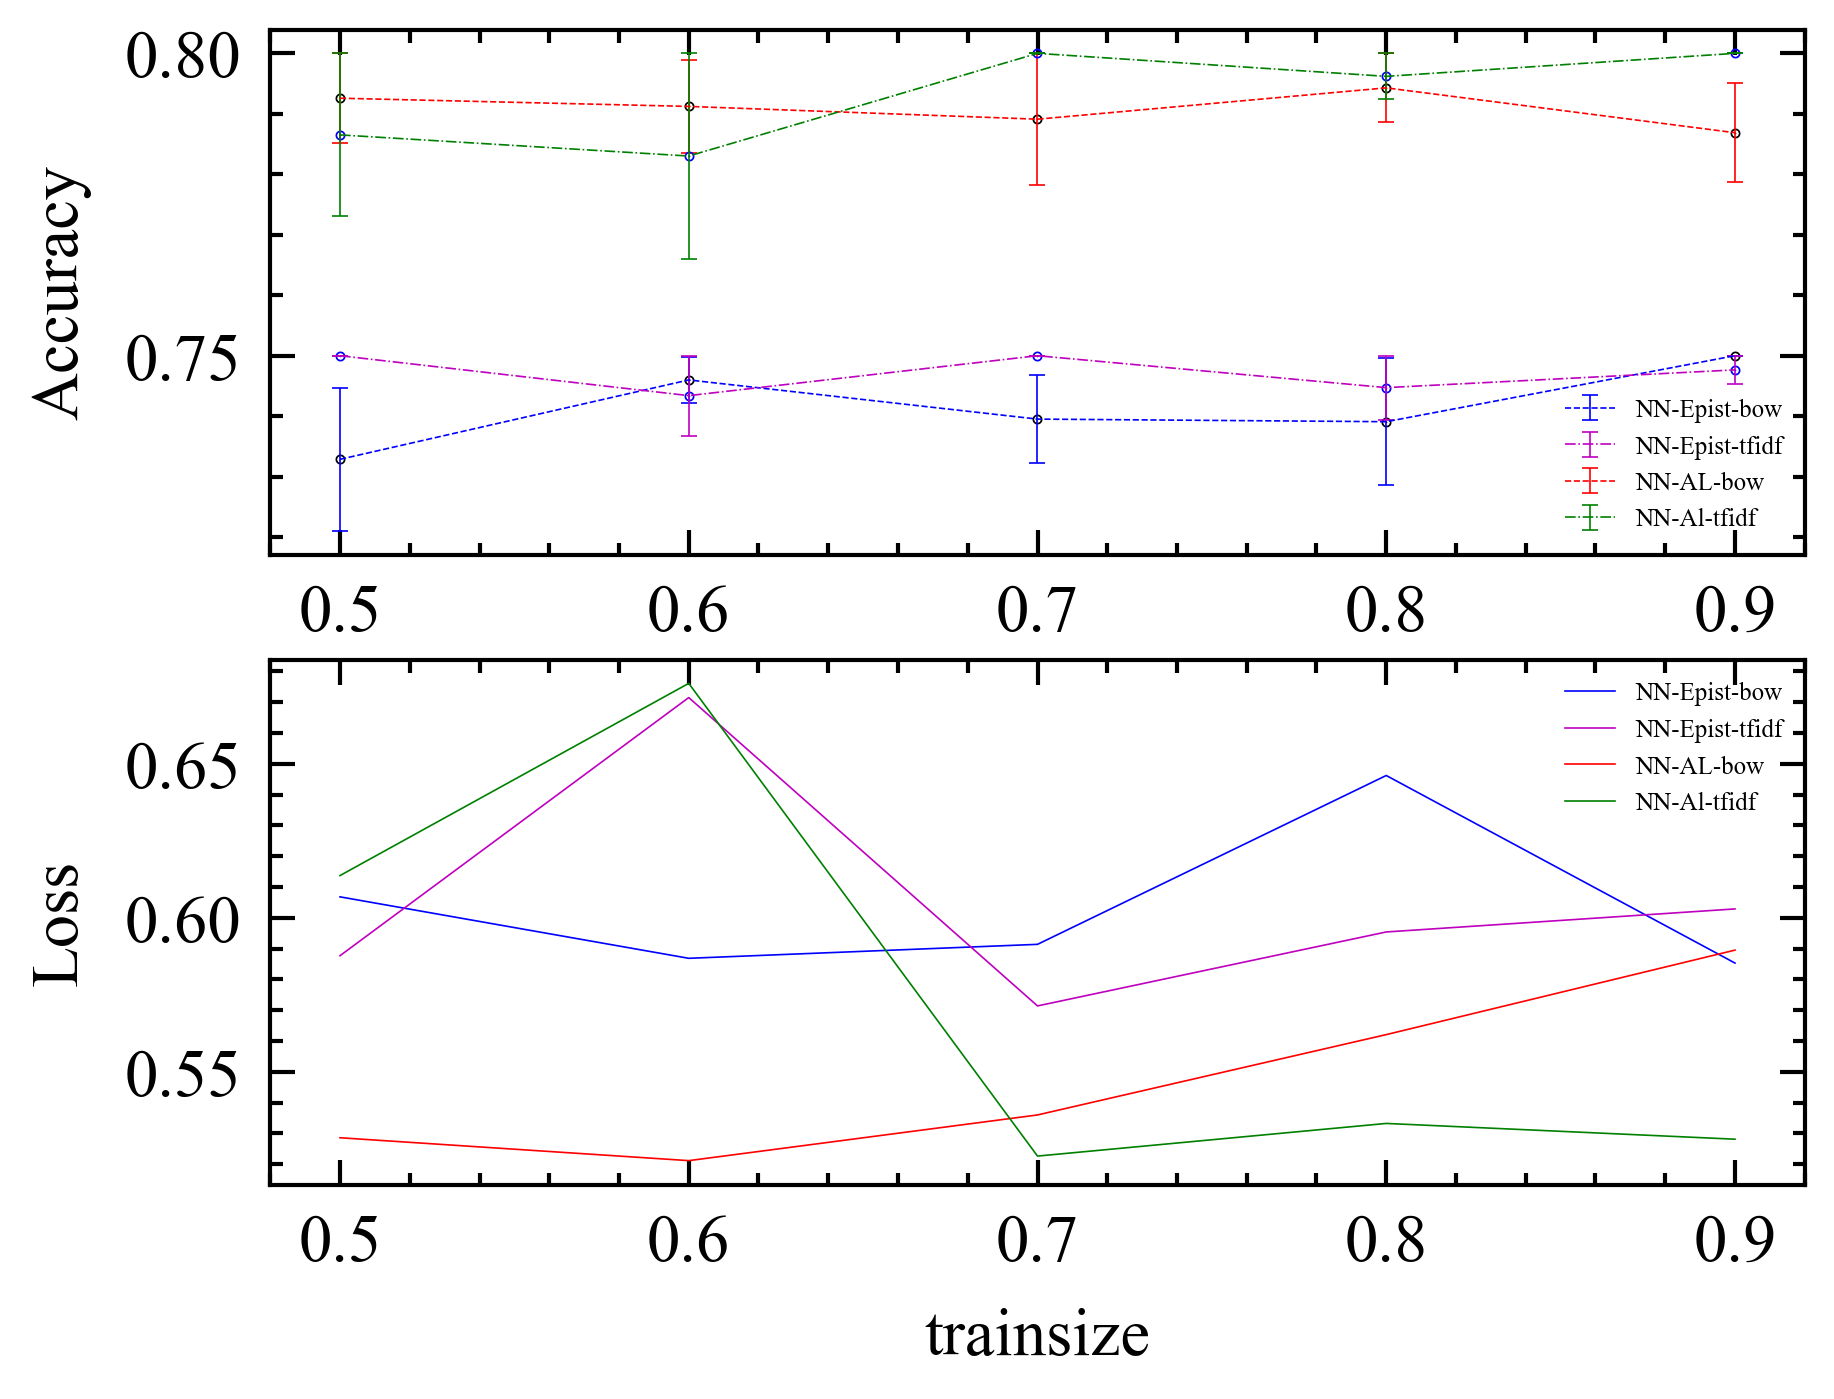

In [58]:
x = np.linspace(1,20,20)
plt.subplot(2,1,1)

plt.plot(train_sizes, df_unpic_opt_bow_rl['accuracy'],'o',  markersize = 0.2)
plt.errorbar(train_sizes, df_unpic_opt_bow_rl['accuracy'], yerr= df_unpic_opt_bow_rl['sem'] , linewidth = 0.2, capsize = 1, capthick=0.2, c = 'b', label = 'NN-Epist-bow')

plt.plot(train_sizes, df_unpic_opt_tf_rl['accuracy'], 'o', markersize = 0.2)
plt.errorbar(train_sizes, df_unpic_opt_tf_rl['accuracy'], yerr= df_unpic_opt_tf_rl['sem'] , linewidth = 0.2, capsize = 1, capthick=0.2, c = 'm', label = 'NN-Epist-tfidf')

plt.plot(train_sizes, df_unpic_opt_bow_al['accuracy'], 'o',  markersize = 0.2)
plt.errorbar(train_sizes, df_unpic_opt_bow_al['accuracy'], yerr= df_unpic_opt_bow_al['sem'] , linewidth = 0.2, capsize = 1, capthick=0.2, c= 'r', label = 'NN-AL-bow')

plt.plot(train_sizes, df_unpic_opt_tf_al['accuracy'], 'o', markersize = 0.2)
plt.errorbar(train_sizes, df_unpic_opt_tf_al['accuracy'], yerr= df_unpic_opt_tf_al['sem'] , linewidth = 0.2, capsize = 1, capthick=0.2, c = 'g', label = 'NN-Al-tfidf')



#plt.ylim(0.775, 0.801)
plt.legend( prop = {'size':3})
plt.ylabel('Accuracy')
plt.xlabel('Iterations')


plt.subplot(2,1,2)

plt.plot(train_sizes, df_unpic_opt_bow_rl['loss'],'-', label = 'NN-Epist-bow',  linewidth = 0.2, c = 'b')

plt.plot(train_sizes, df_unpic_opt_tf_rl['loss'], '-', label = 'NN-Epist-tfidf', linewidth = 0.2, c = 'm')


plt.plot(train_sizes, df_unpic_opt_bow_al['loss'], '-', label = 'NN-AL-bow',  linewidth = 0.2, c = 'r')

plt.plot(train_sizes, df_unpic_opt_tf_al['loss'], '-', label = 'NN-Al-tfidf', linewidth = 0.2, c = 'g')


#plt.ylim(0.775, 0.801)
plt.legend( prop = {'size':3})
plt.ylabel('Loss')
plt.xlabel('trainsize')